In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [60]:
df = pd.read_csv('smartphone_cleaned.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_names                841 non-null    object 
 1   model                      841 non-null    object 
 2   price                      841 non-null    int64  
 3   rating                     784 non-null    float64
 4   has_5g                     841 non-null    bool   
 5   has_nfc                    841 non-null    bool   
 6   has_ir_blaster             841 non-null    bool   
 7   processor_brand            827 non-null    object 
 8   num_cores                  839 non-null    float64
 9   processor_speed            831 non-null    float64
 10  ram_capacity               841 non-null    float64
 11  internal_memory            841 non-null    float64
 12  battery_capacity           838 non-null    float64
 13  fast_charging_available    841 non-null    int64  

In [62]:
#HANDLING MISSING VALUES

In [63]:
# knn imputer

In [64]:
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [65]:
from sklearn.impute import KNNImputer

In [66]:
imputer = KNNImputer(n_neighbors=5)

In [67]:
x_df_values = imputer.fit_transform(x_df)

In [68]:
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)

In [69]:
x_df['price'] = df['price']

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_names                841 non-null    object 
 1   model                      841 non-null    object 
 2   price                      841 non-null    int64  
 3   rating                     784 non-null    float64
 4   has_5g                     841 non-null    bool   
 5   has_nfc                    841 non-null    bool   
 6   has_ir_blaster             841 non-null    bool   
 7   processor_brand            827 non-null    object 
 8   num_cores                  839 non-null    float64
 9   processor_speed            831 non-null    float64
 10  ram_capacity               841 non-null    float64
 11  internal_memory            841 non-null    float64
 12  battery_capacity           838 non-null    float64
 13  fast_charging_available    841 non-null    int64  

In [71]:
numerical_columns = x_df.select_dtypes(include=['int64','float64']).columns

In [72]:
# Update the values in df_copy from x_df
df[numerical_columns] = x_df[numerical_columns]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_names                841 non-null    object 
 1   model                      841 non-null    object 
 2   price                      841 non-null    int64  
 3   rating                     841 non-null    float64
 4   has_5g                     841 non-null    bool   
 5   has_nfc                    841 non-null    bool   
 6   has_ir_blaster             841 non-null    bool   
 7   processor_brand            827 non-null    object 
 8   num_cores                  841 non-null    float64
 9   processor_speed            841 non-null    float64
 10  ram_capacity               841 non-null    float64
 11  internal_memory            841 non-null    float64
 12  battery_capacity           841 non-null    float64
 13  fast_charging_available    841 non-null    float64

In [74]:
df[df['processor_brand'].isna()]

,brand_names,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_available,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
183,itel,itel S23,7599,75.0,False,False,False,NaN,8.0,1.60,8.0,128.0,5000.0,1.0,10.0,6.60,1600 x 720,90.0,2.0,1.0,android,50.0,8.0,1.0,512.0
235,ikall,iKall Z19 Pro,7229,60.0,False,False,False,NaN,4.0,1.60,4.0,64.0,5000.0,1.0,-1.0,6.50,720 x 1600,60.0,1.0,1.0,android,13.0,8.0,1.0,128.0
353,samsung,Samsung Galaxy A13,11249,75.0,False,False,False,NaN,8.0,2.00,4.0,64.0,5000.0,1.0,25.0,6.60,1080 x 2408,60.0,4.0,1.0,android,50.0,8.0,1.0,1024.0
363,ikall,iKall K333 Plus,3420,65.8,False,False,False,NaN,4.0,1.30,2.0,16.0,3000.0,1.0,-1.0,2.80,240 x 360,60.0,1.0,1.0,android,2.0,2.0,1.0,128.0
381,ikall,iKall K510 New,4999,69.6,False,False,False,NaN,4.0,1.30,2.0,32.0,3000.0,1.0,-1.0,5.00,480 x 854,60.0,1.0,1.0,android,13.0,5.0,1.0,256.0
401,ikall,iKall S2,9489,68.0,False,False,False,NaN,4.0,1.60,6.0,128.0,6000.0,1.0,-1.0,6.80,720 x 1600,60.0,3.0,1.0,android,21.0,8.0,1.0,128.0
528,ikall,iKall Z19 Pro Ultra,7989,65.0,False,False,False,NaN,6.0,1.60,6.0,128.0,5000.0,1.0,-1.0,6.50,720 x 1600,60.0,2.0,1.0,android,13.0,8.0,1.0,512.0
616,itel,itel S23 (4GB RAM +128 GB),7299,70.0,False,False,False,NaN,8.0,1.60,4.0,128.0,5000.0,1.0,10.0,6.60,1600 x 720,90.0,2.0,1.0,android,50.0,8.0,1.0,512.0
700,ikall,iKall K575,4999,69.6,False,False,False,NaN,8.0,2.00,2.0,32.0,3000.0,1.0,-1.0,5.00,480 x 850,60.0,1.0,1.0,android,13.0,5.0,1.0,256.0
703,ikall,iKall S2 Star,9499,67.0,False,False,False,NaN,4.0,1.60,6.0,128.0,6000.0,1.0,-1.0,6.80,720 x 1600,60.0,3.0,1.0,android,21.0,8.0,1.0,128.0


In [75]:
df.loc[(df['brand_names'] == 'samsung') & (df['processor_brand'].isna()), 'processor_brand'] = 'exynos'
df.loc[(df['brand_names'].isin(['ikall', 'itel', 'tecno'])) & (df['processor_brand'].isna()), 'processor_brand'] = 'mediatek'


In [77]:
df.isnull().sum()

brand_names                  0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
ram_capacity                 0
internal_memory              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
screen_size                  0
resolution                   0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
dtype: int64

# univariate 

<Axes: xlabel='brand_names'>

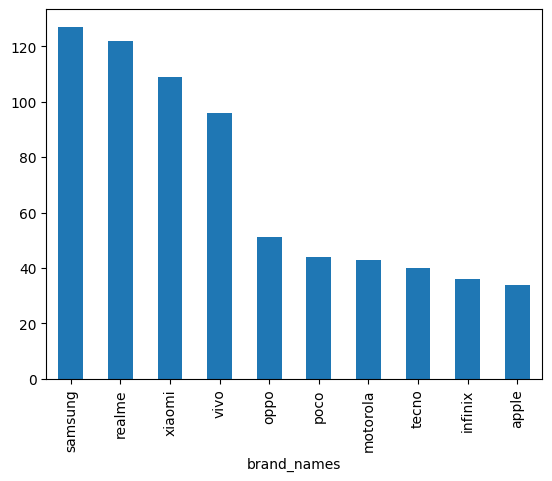

In [78]:
# plot a graph of top 5 brands
df['brand_names'].value_counts().head(10).plot(kind='bar')


<Axes: ylabel='count'>

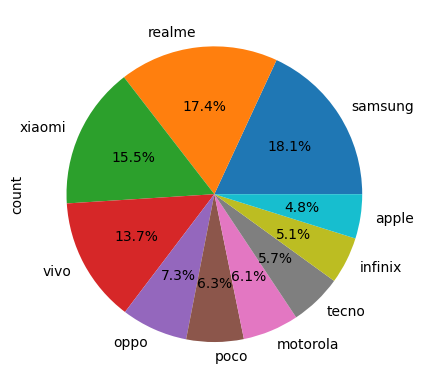

In [79]:
# pie chart
df['brand_names'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%')

from above it is clear that samsung is leading the market

In [80]:
# price
df['price'].describe()

count       841.000000
mean      25092.692033
std       27528.870329
min        3420.000000
25%       10199.000000
50%       15999.000000
75%       26622.000000
max      196900.000000
Name: price, dtype: float64

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


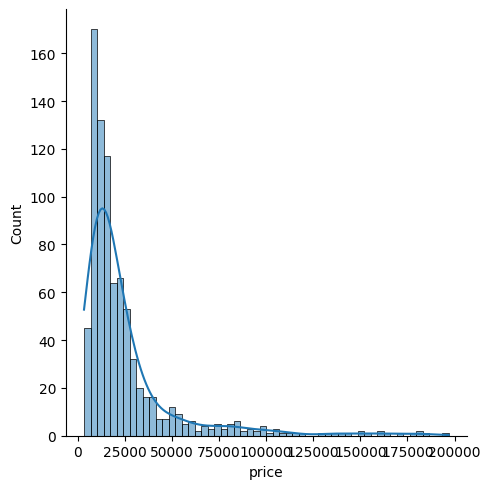

In [81]:
sns.displot(kind='hist',data=df,x='price',kde=True)

In [82]:
df['price'].skew()

3.196315937171853

<Axes: >

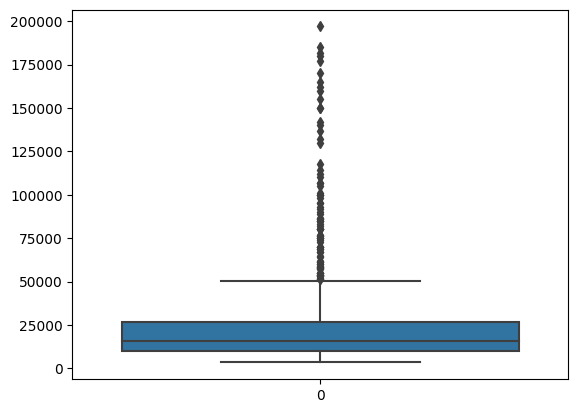

In [83]:
sns.boxplot(df['price'])

In [84]:
#rating
df['rating'].describe()

count    841.000000
mean      77.429251
std        8.017484
min       60.000000
25%       71.000000
50%       79.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


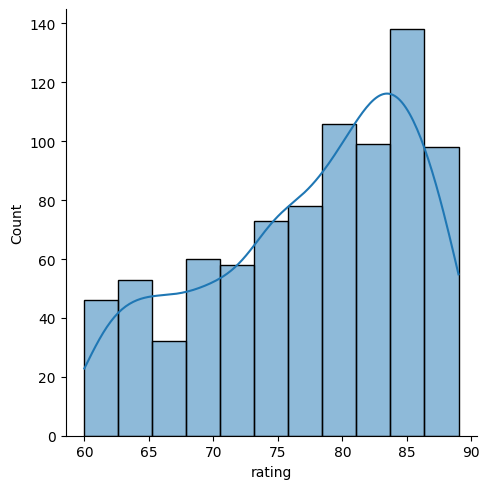

In [85]:
sns.displot(kind='hist',data=df,x='rating',kde=True)

In [86]:
df['rating'].skew()

-0.4984737622491646

<Axes: >

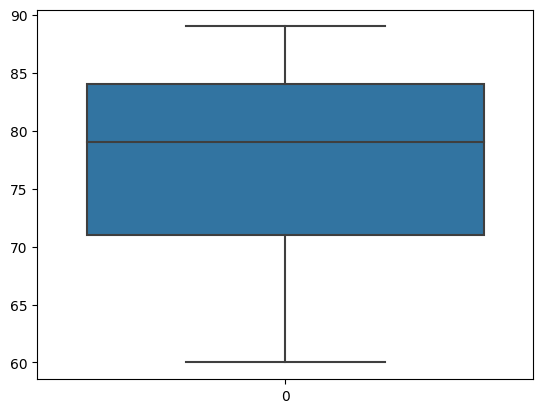

In [87]:
sns.boxplot(df['rating'])

<Axes: ylabel='count'>

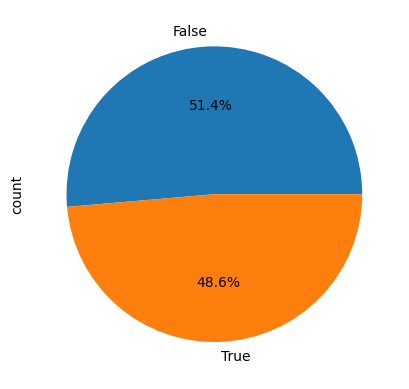

In [88]:
# has_5g
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

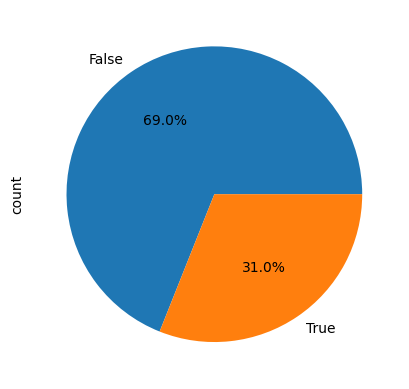

In [89]:
# has_nfc
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

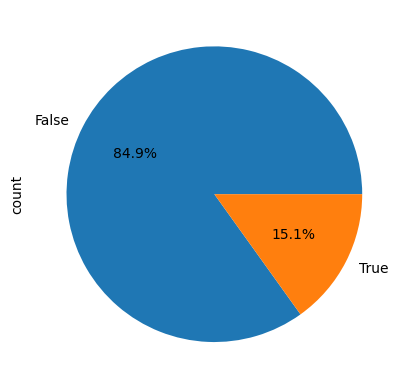

In [90]:
# has_ir_blaster
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='processor_brand'>

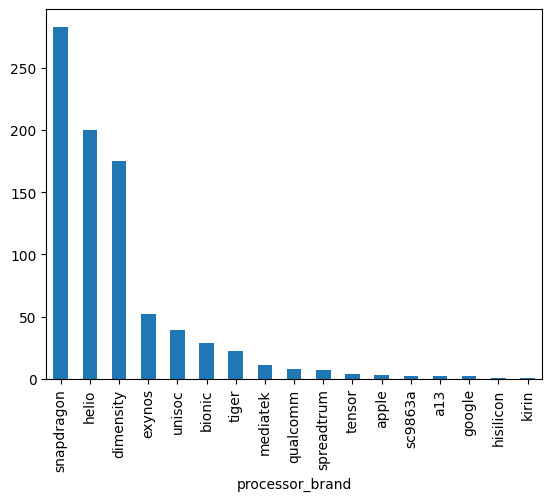

In [91]:
# processor 
df['processor_brand'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

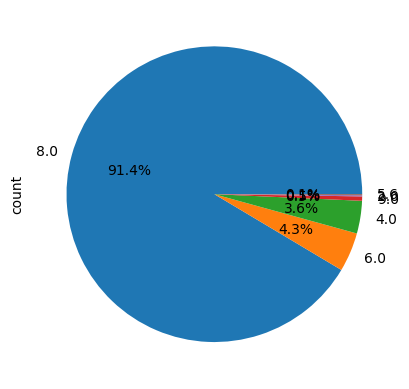

In [92]:
# num_cores
df['num_cores'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: xlabel='processor_speed'>

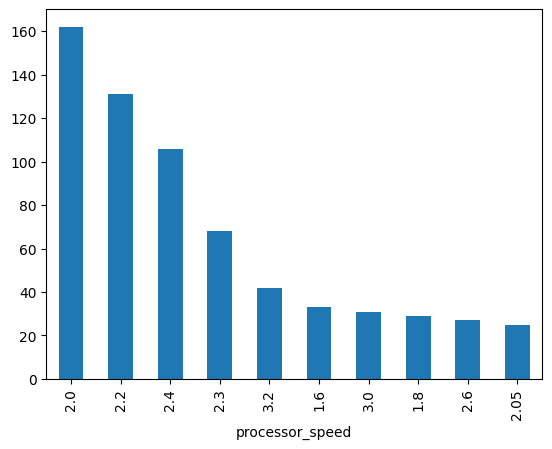

In [93]:
df['processor_speed'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

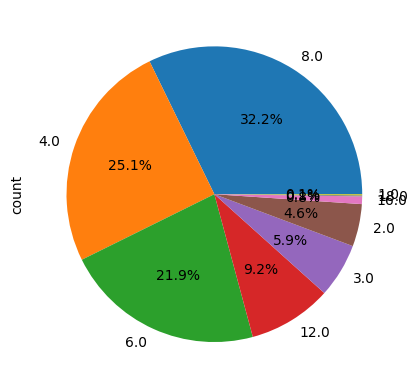

In [94]:
# ram

df['ram_capacity'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

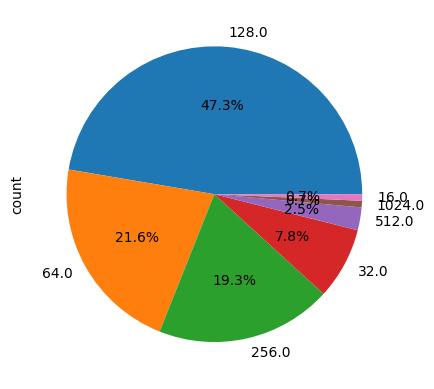

In [95]:
#internal memory  internal_memory 
df['internal_memory'].value_counts().plot(kind='pie',autopct = "%0.1f%%")

<Axes: ylabel='count'>

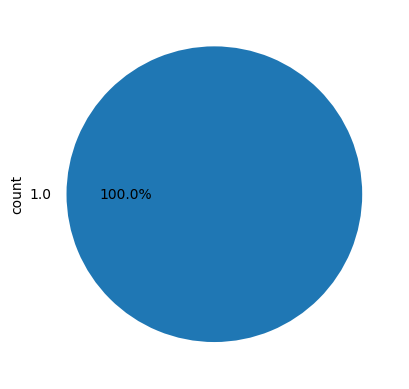

In [96]:
#fast_charging_available 
df['fast_charging_available'].value_counts().plot(kind='pie',autopct = "%0.1f%%")

In [120]:
df[df['fast_charging']== -1]

,brand_names,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_available,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
149,xiaomi,Xiaomi Redmi 12C,6999,70.0,False,False,False,helio,8.0,2.000,4.0,64.0,5000.0,1.0,-1.0,6.71,720 x 1650,60.0,2.0,1.0,android,50.0,5.0,1.0,1024.0
163,apple,Apple iPhone 11,43900,73.0,False,True,False,a13,6.0,2.650,4.0,64.0,3110.0,1.0,-1.0,6.10,828 x 1792,60.0,2.0,1.0,ios,12.0,12.0,0.0,233.6
206,oppo,Oppo A18,9999,64.0,False,False,False,helio,8.0,2.000,4.0,64.0,5000.0,1.0,-1.0,6.56,720 x 1612,60.0,2.0,1.0,android,8.0,5.0,1.0,563.2
223,lava,Lava Blaze 5G,9999,73.0,True,False,False,dimensity,8.0,2.200,4.0,128.0,5000.0,1.0,-1.0,6.50,1600 x 720,90.0,3.0,1.0,android,50.0,8.0,1.0,1024.0
232,apple,Apple iPhone 12 (128GB),48999,75.0,True,True,False,bionic,6.0,3.100,4.0,128.0,3925.8,1.0,-1.0,6.10,1170 x 2532,60.0,2.0,1.0,ios,12.0,12.0,0.0,307.2
235,ikall,iKall Z19 Pro,7229,60.0,False,False,False,mediatek,4.0,1.600,4.0,64.0,5000.0,1.0,-1.0,6.50,720 x 1600,60.0,1.0,1.0,android,13.0,8.0,1.0,128.0
285,ikall,iKall K333 4G,3420,65.8,False,False,False,helio,6.0,1.984,2.0,16.0,3000.0,1.0,-1.0,2.80,240 x 360,60.0,1.0,1.0,android,2.0,2.0,1.0,128.0
300,motorola,Motorola Moto E40,7310,71.0,False,False,False,tiger,8.0,1.800,4.0,64.0,5000.0,1.0,-1.0,6.50,720 x 1600,90.0,3.0,1.0,android,48.0,8.0,1.0,1024.0
322,xiaomi,Xiaomi Redmi 12C (6GB RAM + 128GB),8999,74.0,False,False,False,helio,8.0,2.000,6.0,128.0,5000.0,1.0,-1.0,6.71,720 x 1650,60.0,2.0,1.0,android,50.0,5.0,1.0,1024.0
334,lava,Lava Blaze 5G (8GB RAM + 128GB),11999,77.0,True,False,False,dimensity,8.0,2.200,8.0,128.0,5000.0,1.0,-1.0,6.50,1600 x 720,90.0,3.0,1.0,android,50.0,8.0,1.0,1024.0


<Axes: xlabel='fast_charging'>

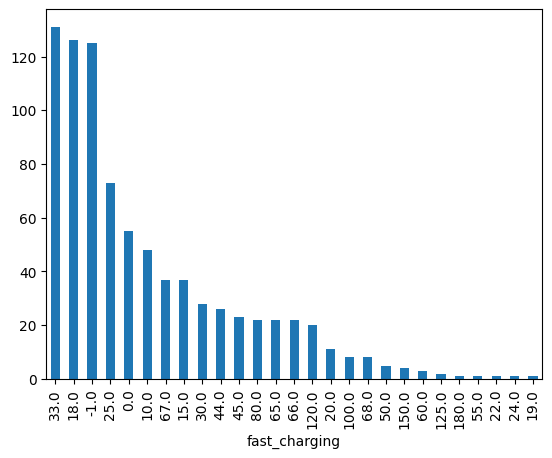

In [97]:
#fast_charging
df['fast_charging'].value_counts().plot(kind ='bar')


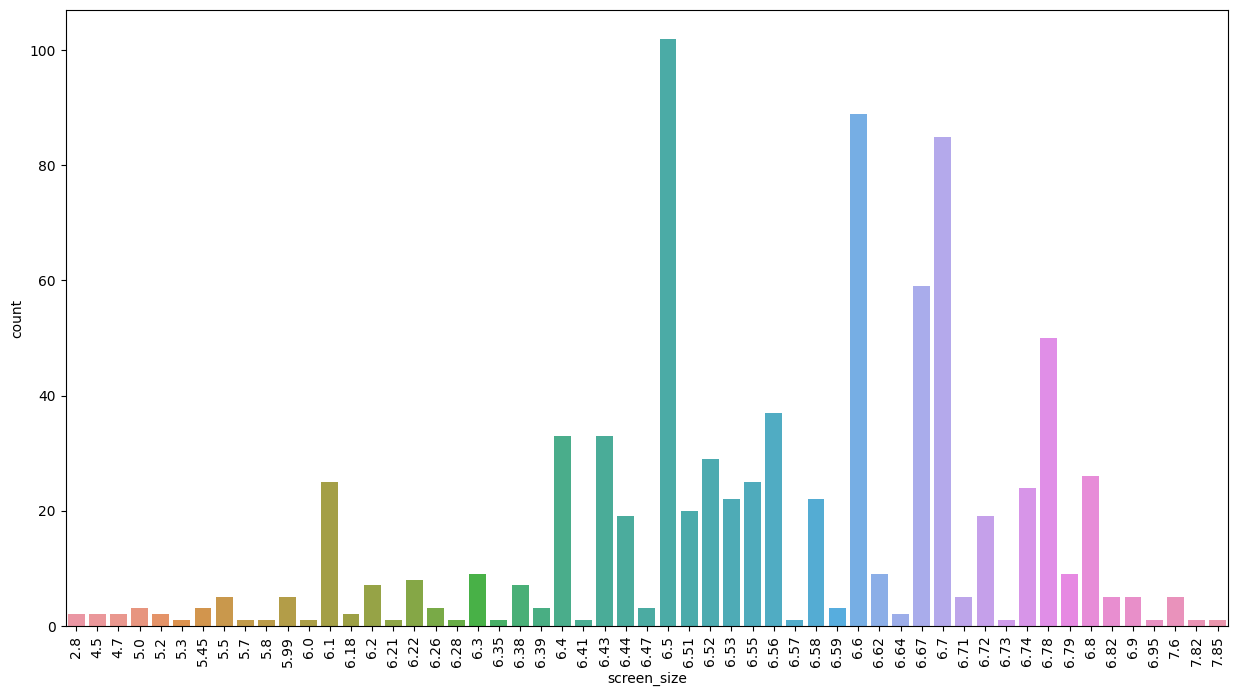

In [98]:
#screen_size
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='screen_size')
plt.xticks(rotation='vertical')
plt.show()

In [99]:
df['resolution'].value_counts()

resolution
1080 x 2400                         275
720 x 1600                          150
1080 x 2408                          48
1080 x 2340                          42
720 x 1612                           41
1080 x 2412                          38
1080 x 2460                          33
1600 x 720                           18
2400 x 1080                          11
1170 x 2532                          10
1080 x 2640                           9
1440 x 3200                           9
1179 x 2556                           8
1260 x 2800                           8
1080 x 2376                           8
720 x 1520                            7
1440 x 3216                           6
720 x 1650                            6
1240 x 2772                           6
720 x 1640                            6
720 x 1440                            6
720 x 1560                            5
1812 x 2176                           5
1080 x 2280                           5
1284 x 2778                  

In [100]:
# resolution
df[df['resolution'] == 'Full HD+ Display with Punch Hole']

,brand_names,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_available,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
113,motorola,Motorola Moto G14,8499,69.0,False,True,False,tiger,8.0,2.0,4.0,128.0,5000.0,1.0,20.0,6.5,Full HD+ Display with Punch Hole,60.0,2.0,1.0,android,50.0,8.0,1.0,1024.0


In [101]:
df['resolution'] = df['resolution'].replace('Full HD+ Display with Punch Hole', '1080 x 2220')


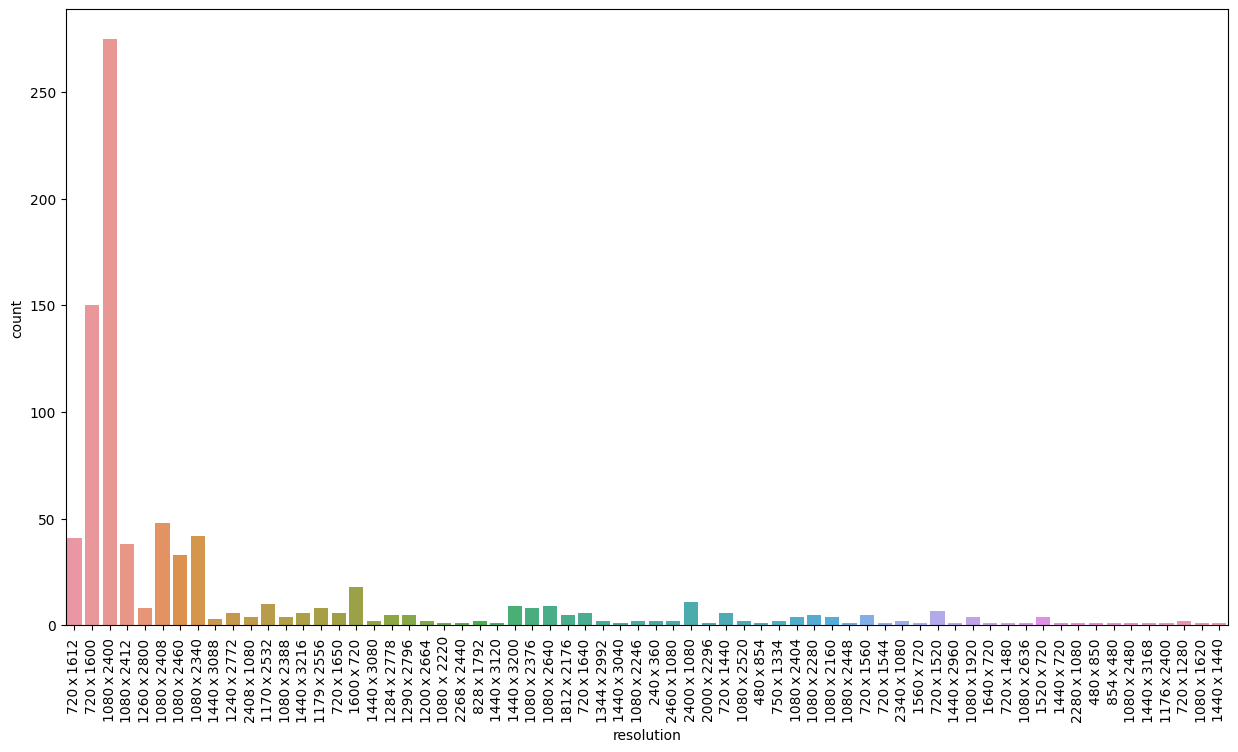

In [102]:
# resolution
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='resolution')
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='count'>

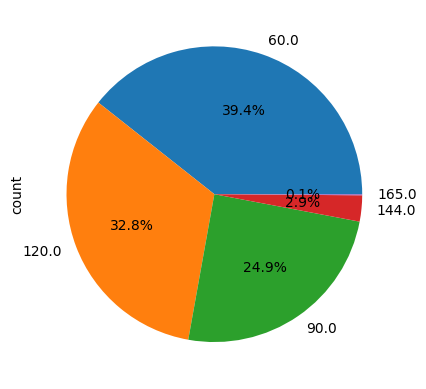

In [103]:
# refresh_rate
df['refresh_rate'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

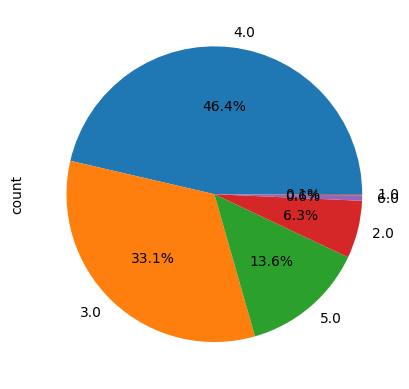

In [104]:
#num_cameras
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: xlabel='primary_camera_rear'>

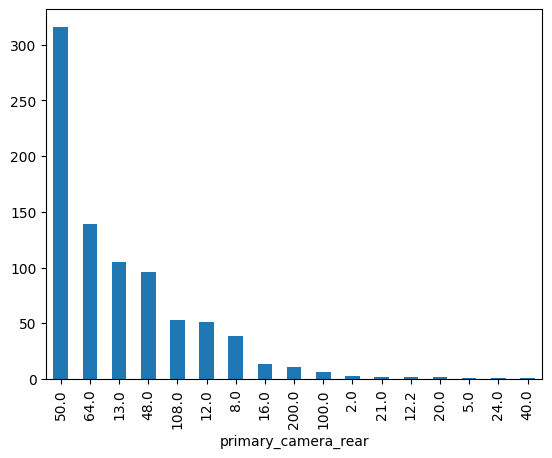

In [105]:
#primary_camera_rear
df['primary_camera_rear'].value_counts().plot(kind='bar')

<Axes: xlabel='primary_camera_front'>

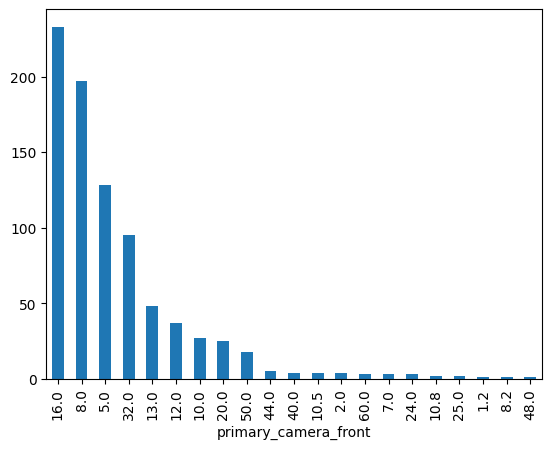

In [106]:
#primary_camera_front
df['primary_camera_front'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

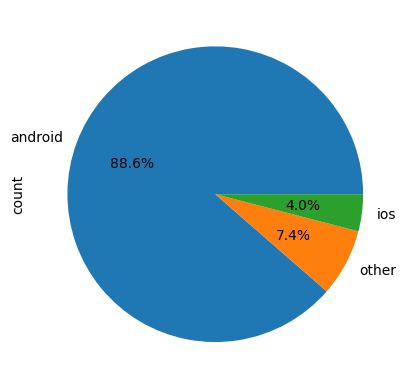

In [107]:
# os
df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

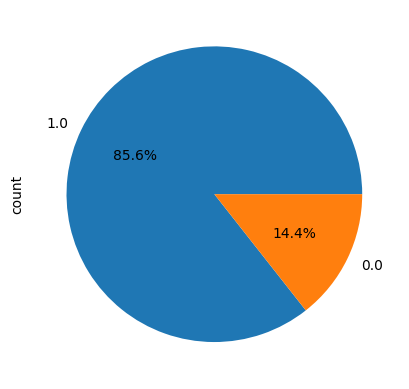

In [108]:
# extended_memory_available
df['extended_memory_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='extended_upto'>

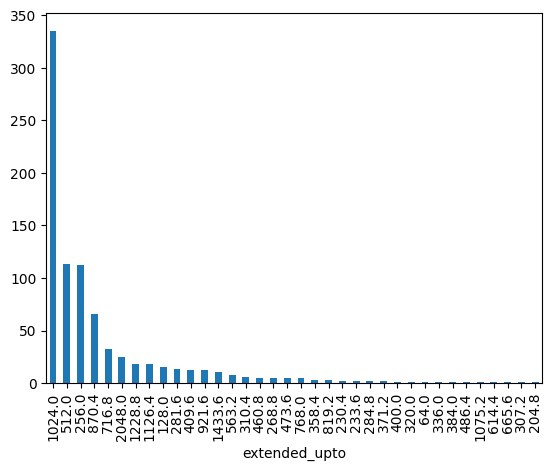

In [109]:
df['extended_upto'].value_counts().plot(kind= 'bar')

From the univariate analysis, we can observe the following insights:

The price distribution is skewed to the right, indicating that most smartphones are in the lower price range.
The rating distribution is approximately normally distributed with a slight left skew.
Most phones have 8 core processor.
Most phones have processor speed b/w 2-2.4 GZ
Ram Capacity 8gb is dominant and common is 4gb and 6gb.
128Gb internal memomry is dominant.
Around 85% phones have fast charging with highly 33 watt fast charging
Most smartphones in the dataset do not have NFC or an IR blaster.
The majority of smartphones have a battery capacity around 5000 mAh.
Screen sizes are mostly clustered around 6.4 to 6.8 inches having 6.5 inches is common
Most Phones have resolutions 1080 x 2400 i.e full hd+
Around 39.5% Phones have 60hz refress rate following 32.7% with 120hz.
Around 94% Phones are of android and 4% of ios operating system

In [110]:

# Define categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.drop(['model']).tolist()
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [111]:
# Correlation matrix for numerical columns
correlation_matrix_numerical = df[numerical_features].corr()

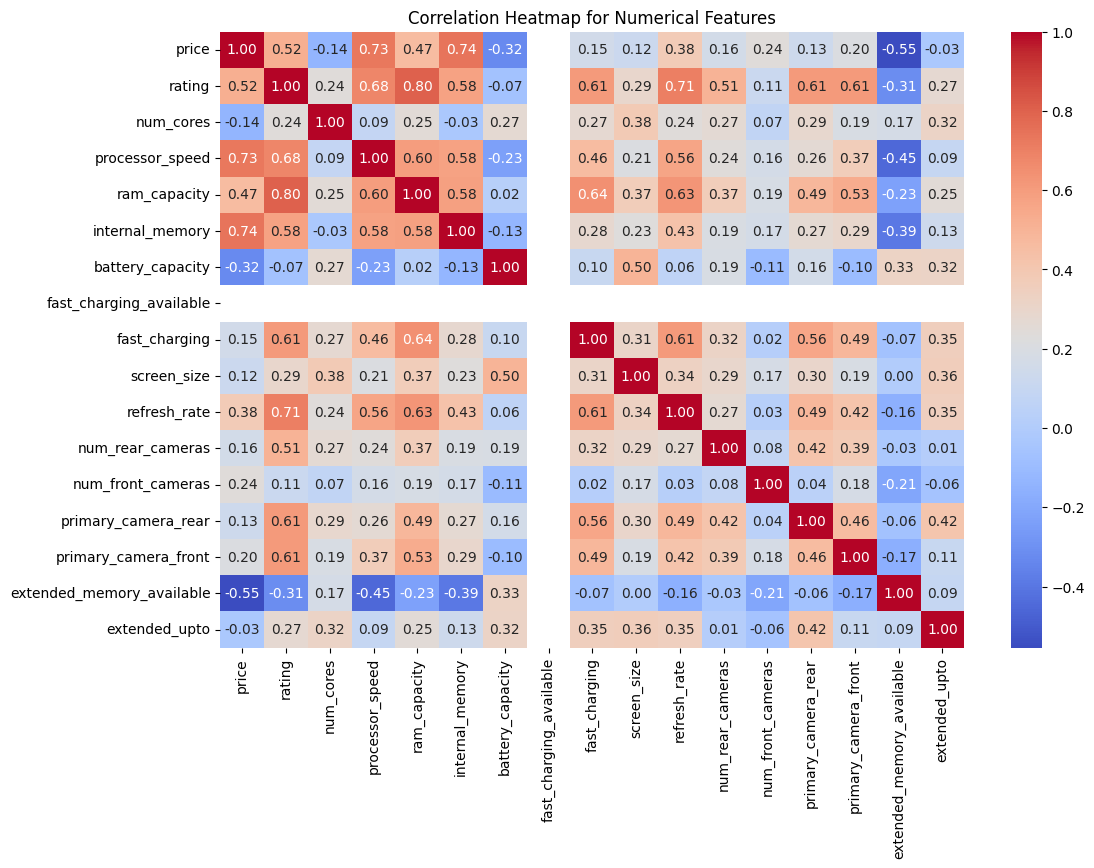

In [112]:
# Heatmap for correlation matrix of numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numerical, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

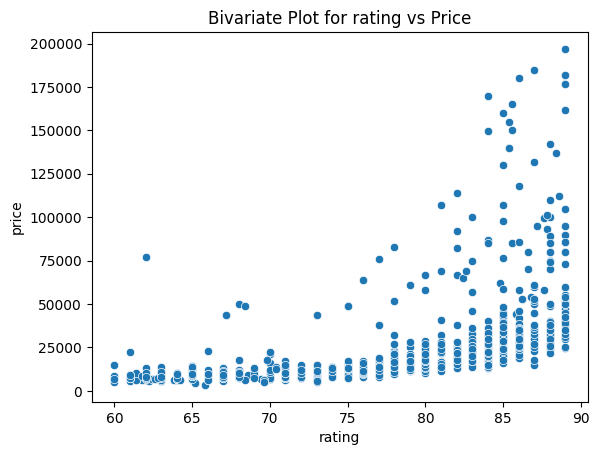

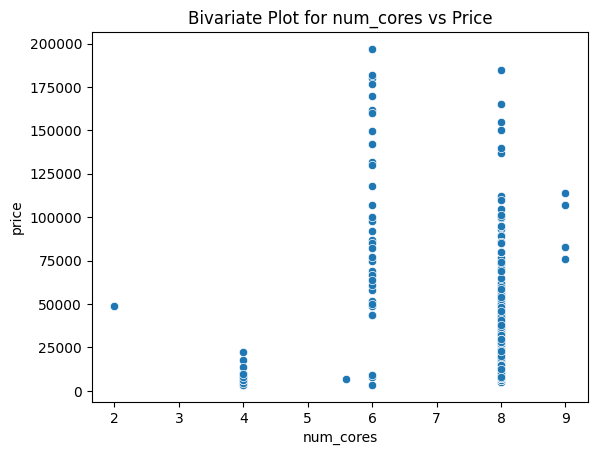

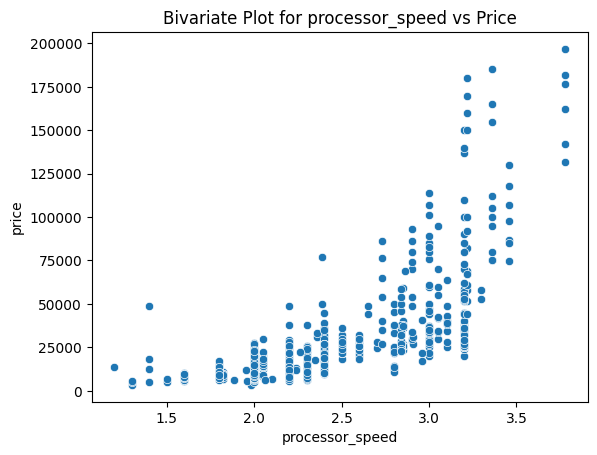

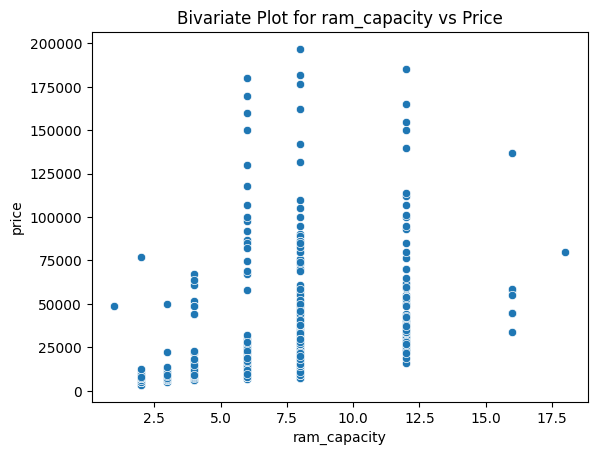

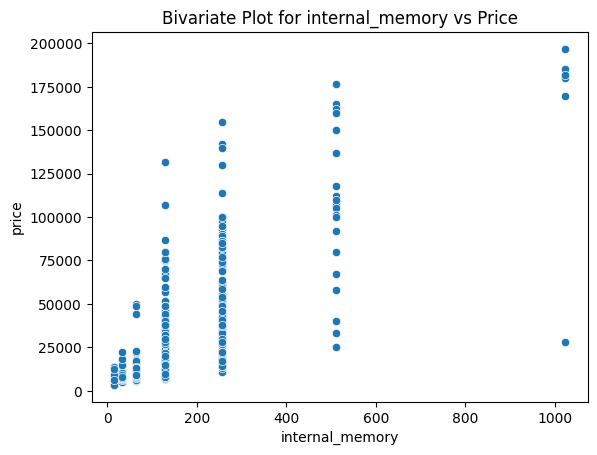

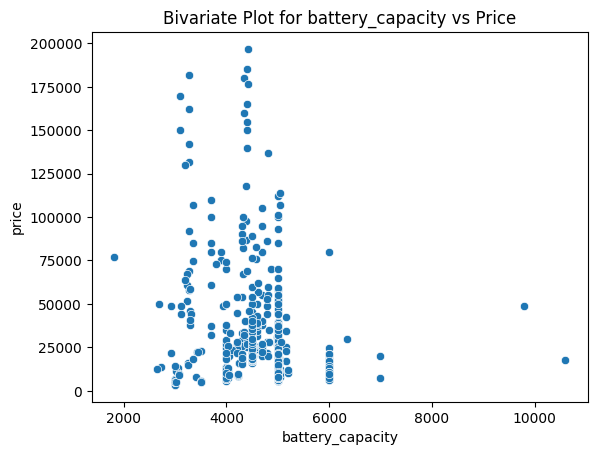

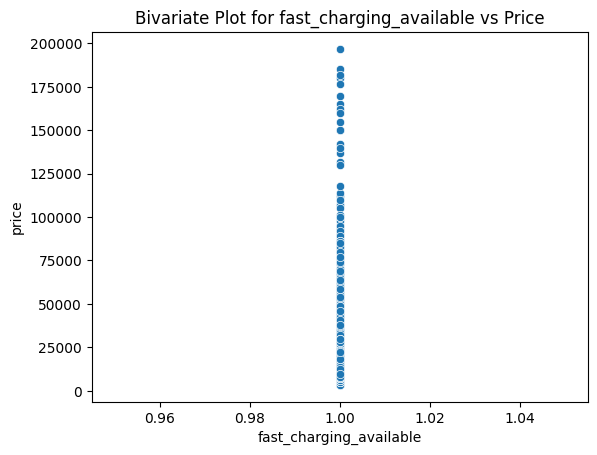

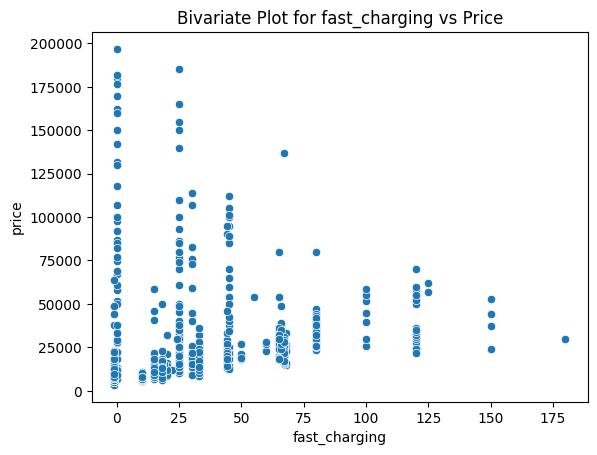

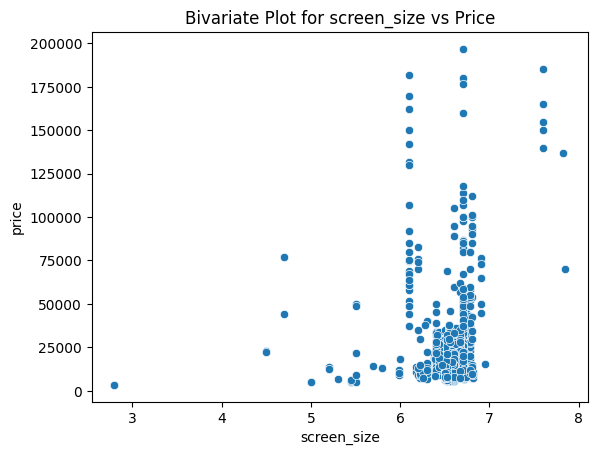

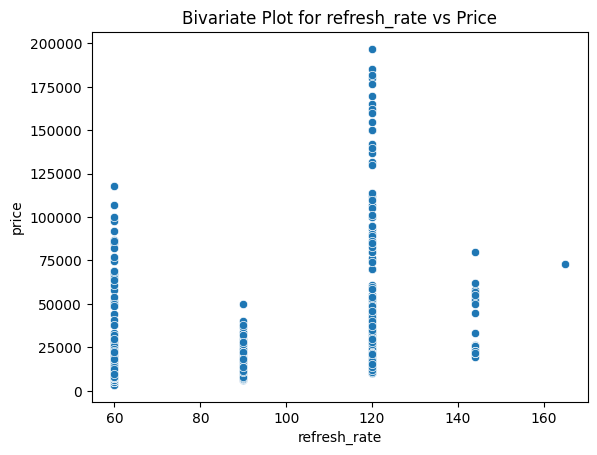

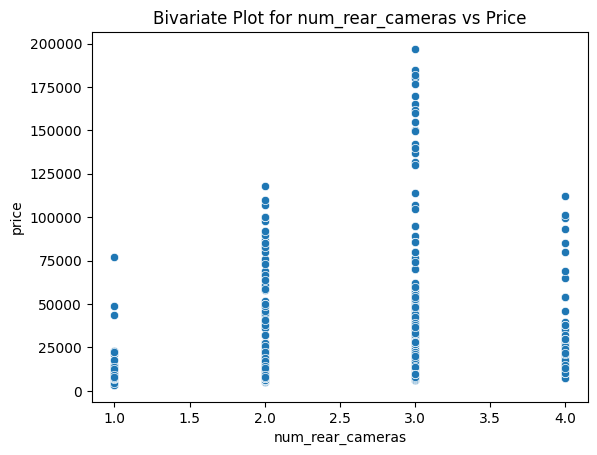

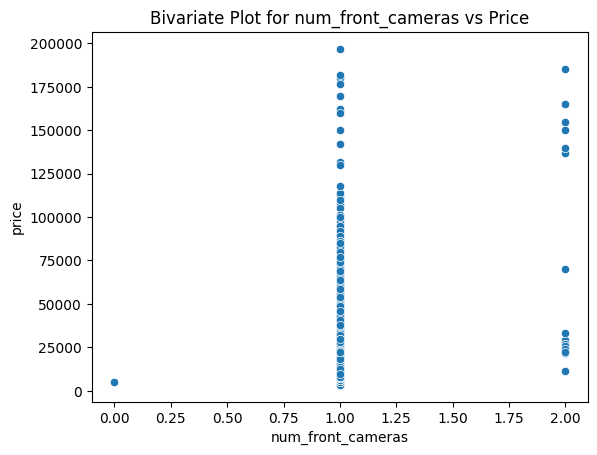

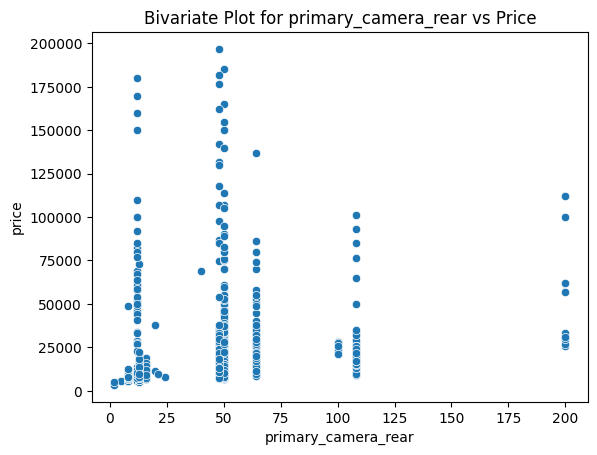

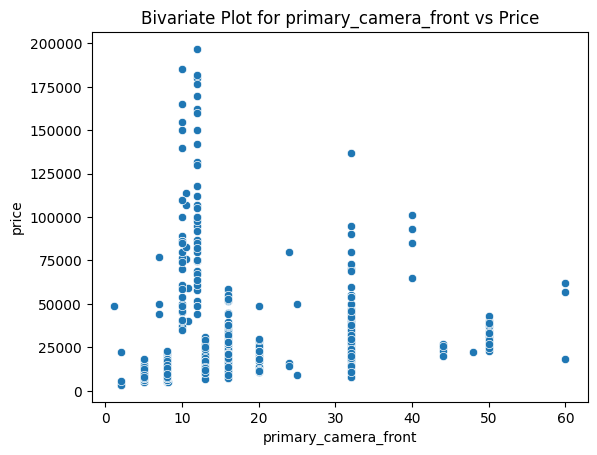

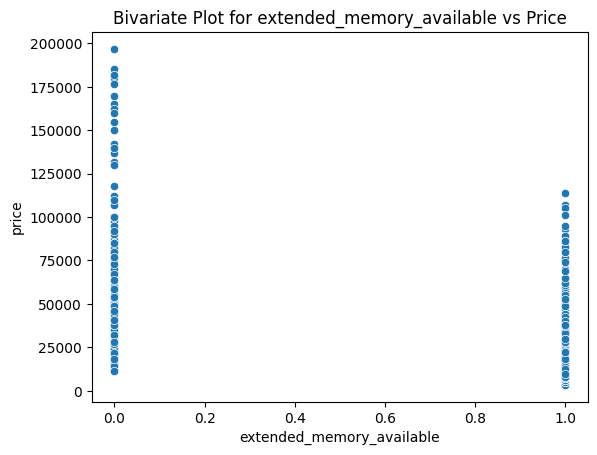

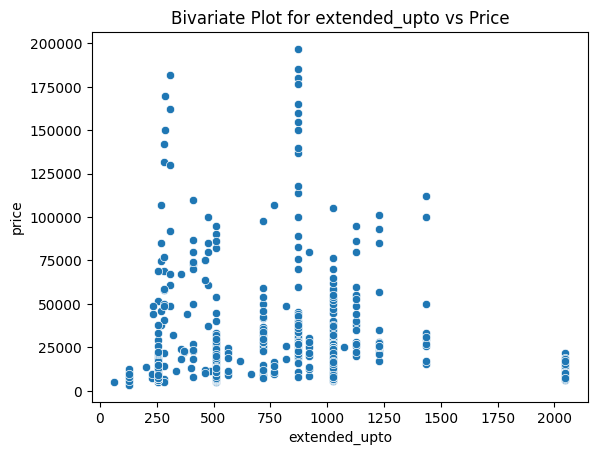

In [113]:
# Create scatter plots for each numerical feature against 'price'
for feature in numerical_features:
    if feature == 'price' and 'fast_charging_available' and 'extended_memory_available':
        pass
    else:
        sns.scatterplot(x=feature, y='price', data=df)
        plt.title(f'Bivariate Plot for {feature} vs Price')
        plt.show()



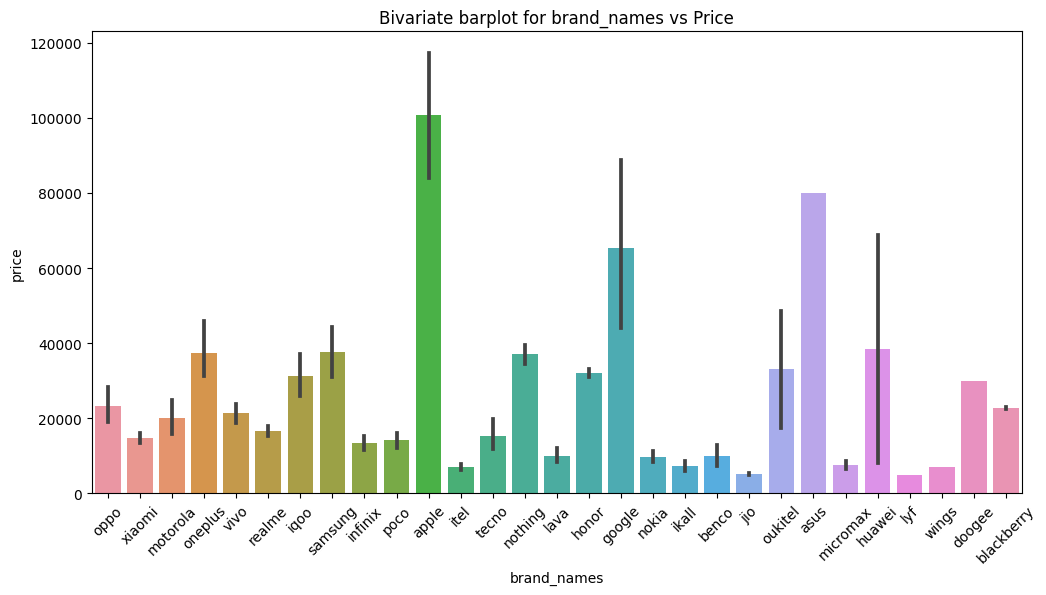

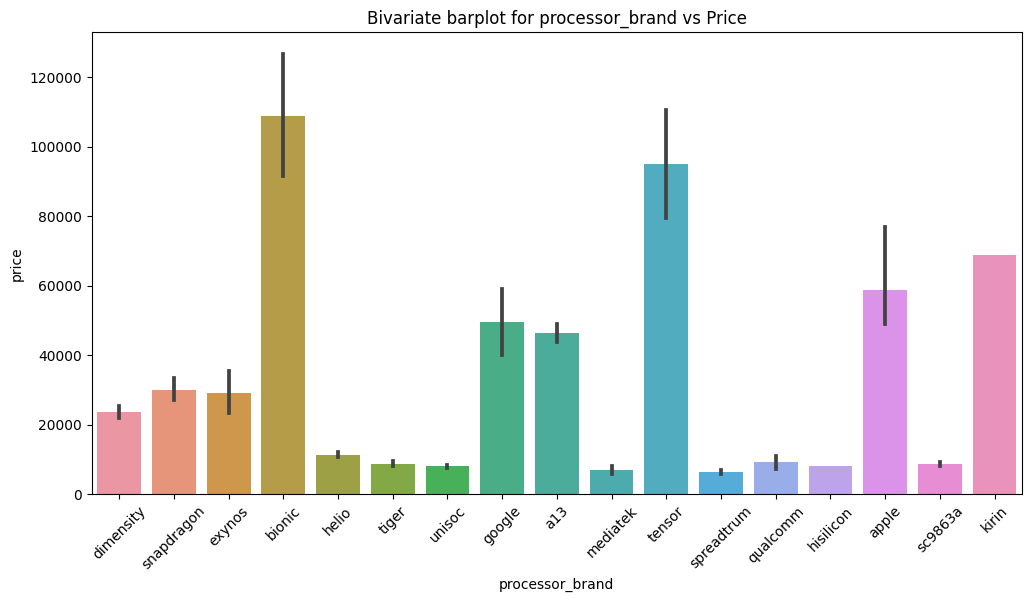

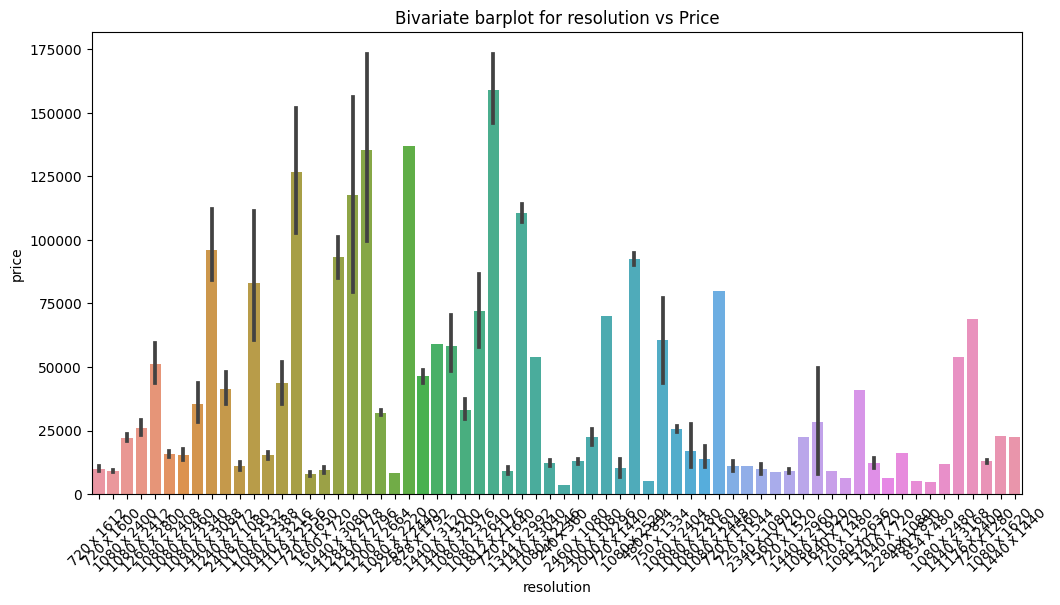

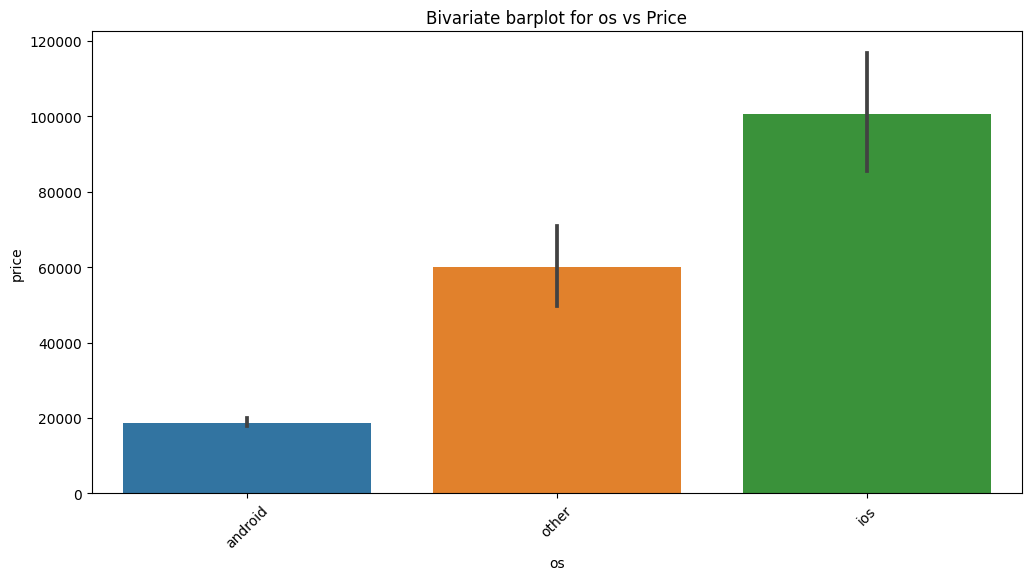

In [114]:
# Create bar plots for each categorical feature against 'price'
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature, y='price', data=df)
    plt.title(f'Bivariate barplot for {feature} vs Price')
    plt.xticks(rotation=45)
    plt.show()

In [115]:
num_pair_col = df.select_dtypes(include=['float64','int64']).iloc[:,[0,1,3,4,5,10]].columns

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


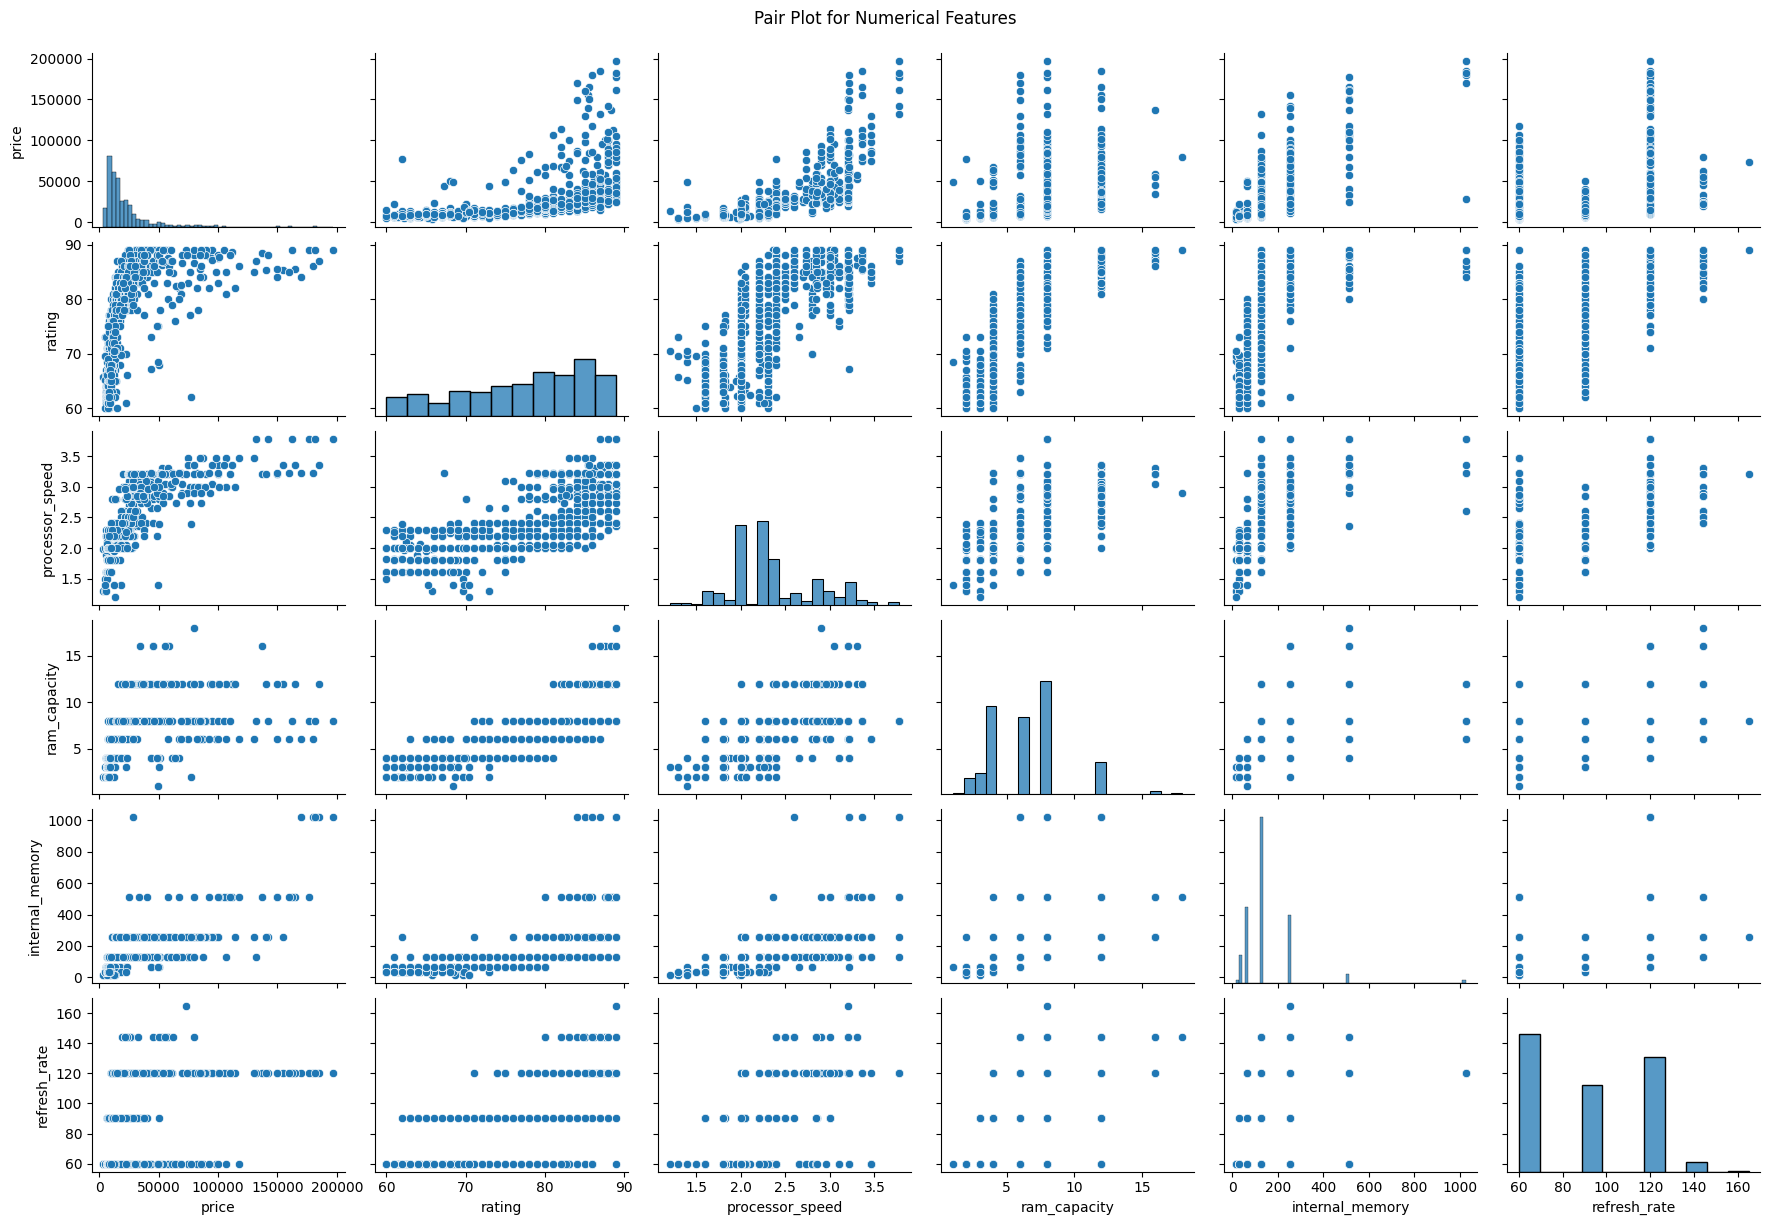

In [116]:
# Pair plot for numerical columns
sns.pairplot(df[num_pair_col], height=2, aspect=1.5)
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()

insights - 
-Apple phones have highest prices following google and asus
-ios operating system is much more cost than android.
-bionic has highest price following tensor and kirin processor

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_names                841 non-null    object 
 1   model                      841 non-null    object 
 2   price                      841 non-null    int64  
 3   rating                     841 non-null    float64
 4   has_5g                     841 non-null    bool   
 5   has_nfc                    841 non-null    bool   
 6   has_ir_blaster             841 non-null    bool   
 7   processor_brand            841 non-null    object 
 8   num_cores                  841 non-null    float64
 9   processor_speed            841 non-null    float64
 10  ram_capacity               841 non-null    float64
 11  internal_memory            841 non-null    float64
 12  battery_capacity           841 non-null    float64
 13  fast_charging_available    841 non-null    float64

In [118]:
df.to_csv('smartphone_cleaned_model.csv',index=False)